# Shopping Data Analysis

Using data science and analysis fundamentals, the shopping dataset can be analysed. The programming language used is Python. Various data science/ machine learning libraries such as pandas, numpy, matplotlib, seaborn, scikit-learn, etc are used for data visualisation, manipulation and analysis.

In [ ]:
import pandas
import pandas as pd
import numpy as np
from colorama import Fore, Style
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from wordcloud import WordCloud
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv')

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

df.head() shows the first five rows of the dataset and the heading column.

In [6]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


Basic information about the dataset such as shape, number of rows and number of columns.

In [7]:
print(f'Shape of the data: {df.shape} ')
print(f'Number of rows: {df.shape[0]} ')
print(f'Number of columns: {df.shape[1]} ')

Shape of the data: (240, 9) 
Number of rows: 240 |
Number of columns: 9|


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


In [9]:
df.describe()

,Transaction ID,Date,Units Sold,Unit Price,Total Revenue
count,240.00000,240,240.000000,240.000000,240.000000
mean,10120.50000,2024-04-29 12:00:00,2.158333,236.395583,335.699375
min,10001.00000,2024-01-01 00:00:00,1.000000,6.500000,6.500000
25%,10060.75000,2024-02-29 18:00:00,1.000000,29.500000,62.965000
50%,10120.50000,2024-04-29 12:00:00,2.000000,89.990000,179.970000
75%,10180.25000,2024-06-28 06:00:00,3.000000,249.990000,399.225000
max,10240.00000,2024-08-27 00:00:00,10.000000,3899.990000,3899.990000
std,69.42622,NaN,1.322454,429.446695,485.804469


## Summary of the data
A basic summary of the data which includes categorical and numerical columns as well as null & duplicate values in each column.

In [10]:
print("Summary of the data:\n")

Cat_cols = [col for col in df.columns if df[col].dtype == 'O']
print(f'Categorical Columns of the data: {Cat_cols}')

N_cols = [col for col in df.columns if df[col].dtype == 'float']
print(f'Numerical Columns of the data: {N_cols}')

print(f'\nThe Null Values of Data are: \n{df.isnull().sum()}')

if df.duplicated().any():
    print(f'\nDuplicates exist in the dataset.')
else:
    print(f'\nNo duplicates found in the dataset.')

Summary of the data:

Categorical Columns of the data: ['Product Category', 'Product Name', 'Region', 'Payment Method']
Numerical Columns of the data: ['Unit Price', 'Total Revenue']

The Null Values of Data are: 
Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

No duplicates found in the dataset.


There are 4 categorical columns and 2 numerical columns.
There are no null values in the dataset.
There are no duplicae values in the dataset.

## Pie Charts
Pie charts to show distributions in terms of product category, region and payment methods.

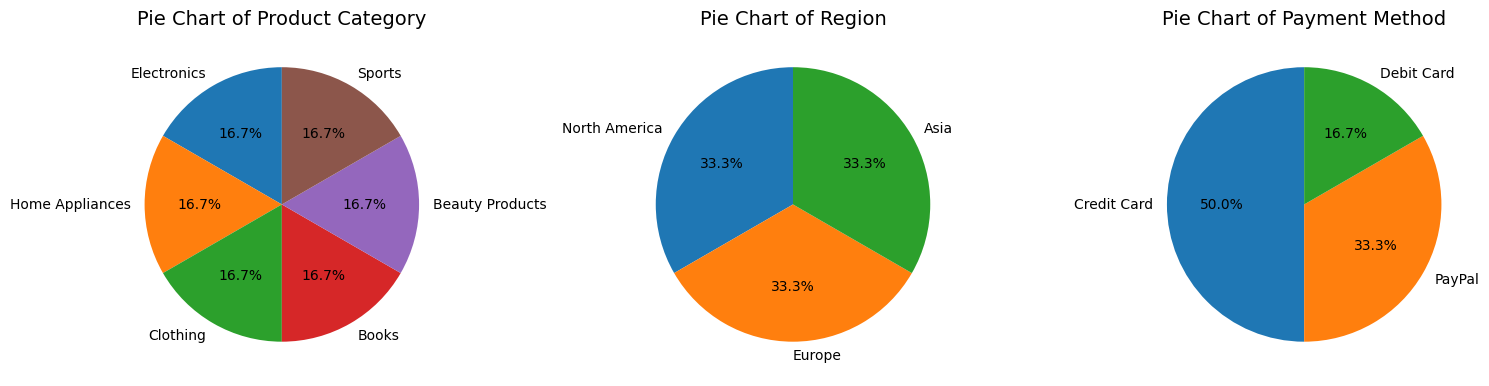

In [11]:
 cat_columns = ['Product Category', 'Region', 'Payment Method']

fig, axes = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(15, 5))
for i, col in enumerate(cat_columns):
    
    counts = df[col].value_counts()
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)  
    
    ax.set_title(f'Pie Chart of {col}', color='black', fontsize=14)

plt.tight_layout()
plt.show()

**Product category:** each product category has an equal share of 16.7% each.

**Region:** each region has an equal share of 33.3% each.

**Payment method:** Credit card has highest share of 50% and debit card has lowest share of 16.7%

## Bar graphs
The bar graphs are used to show frequency with respect to units sold, unit price and total revenue.

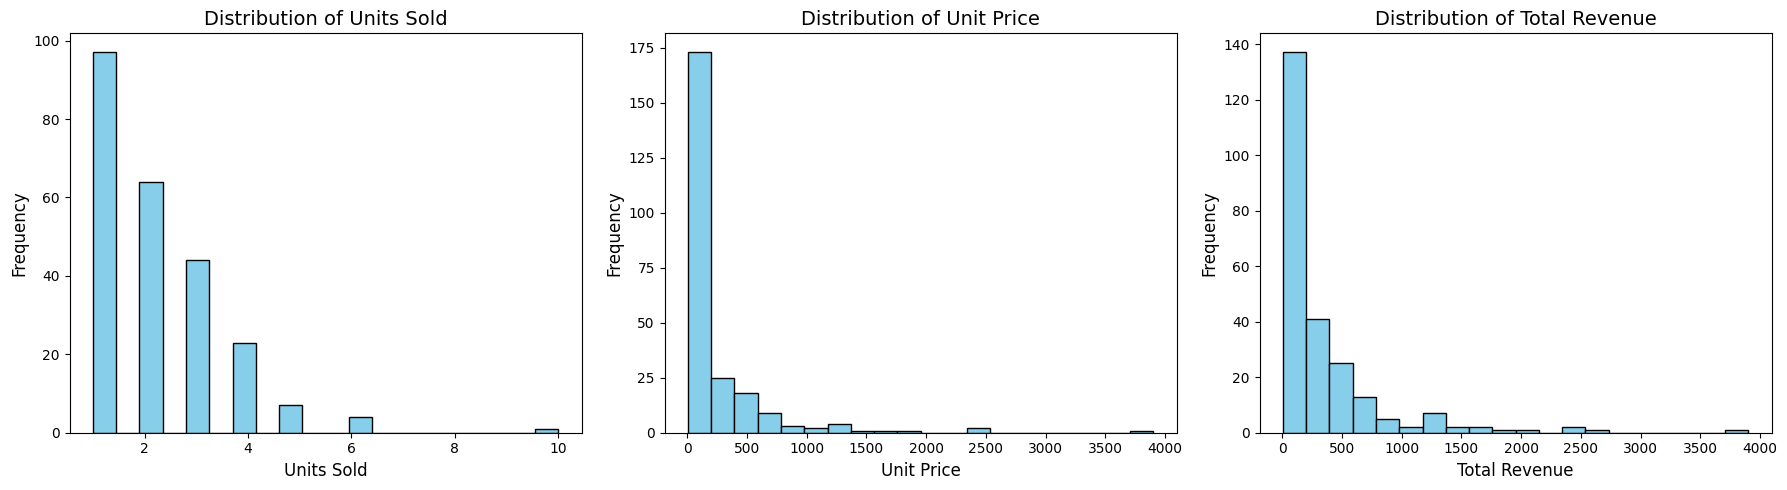

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plotting histograms 
columns_to_plot = ['Units Sold', 'Unit Price', 'Total Revenue']
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

## Word Clouds
Word clouds are used to display the most frequently occuring words in the dataset. 
Here the word clouds are used to show the most shown product categories and brand names.

(-0.5, 799.5, 399.5, -0.5)

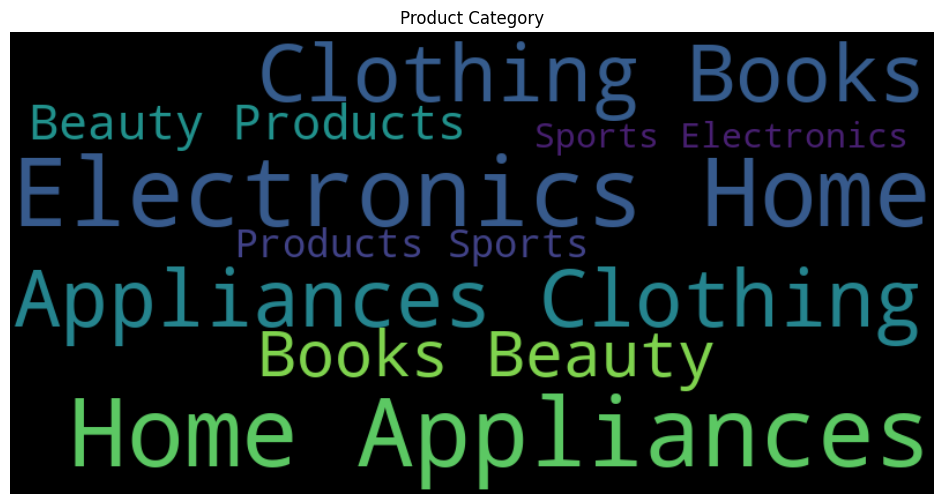

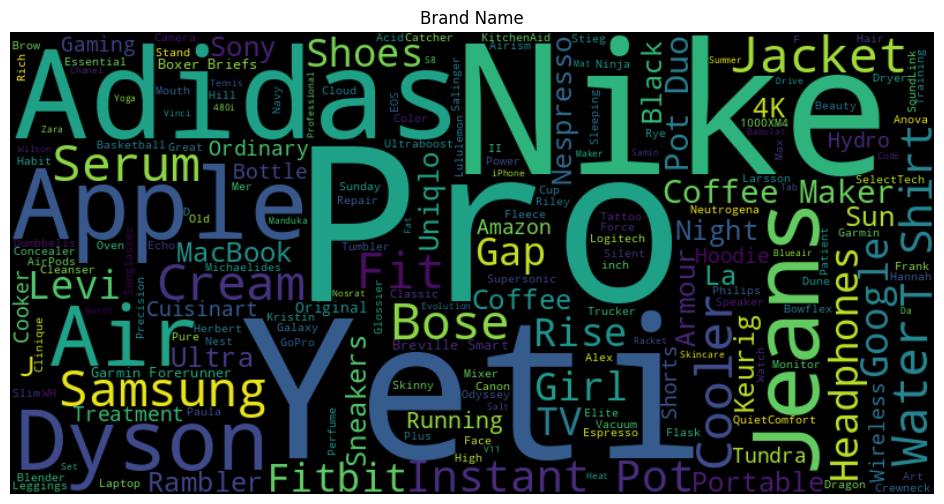

In [13]:
#word clouds
#product category
reviews_text = ' '.join(df['Product Category'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Product Category')
plt.axis('off')

#company name
reviews_text1 = ' '.join(df['Product Name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(reviews_text1)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Brand Name')
plt.axis('off')

Most frequently occuring product categories include home appliances, books, clothing, electronics, beauty, etc.

Most frequently occuring brand names include Adidas, Nike, Samsung, Dyson, Bose, etc.

## Graph over a time period
The graph is used to show trends in total revenue over various months of the year.

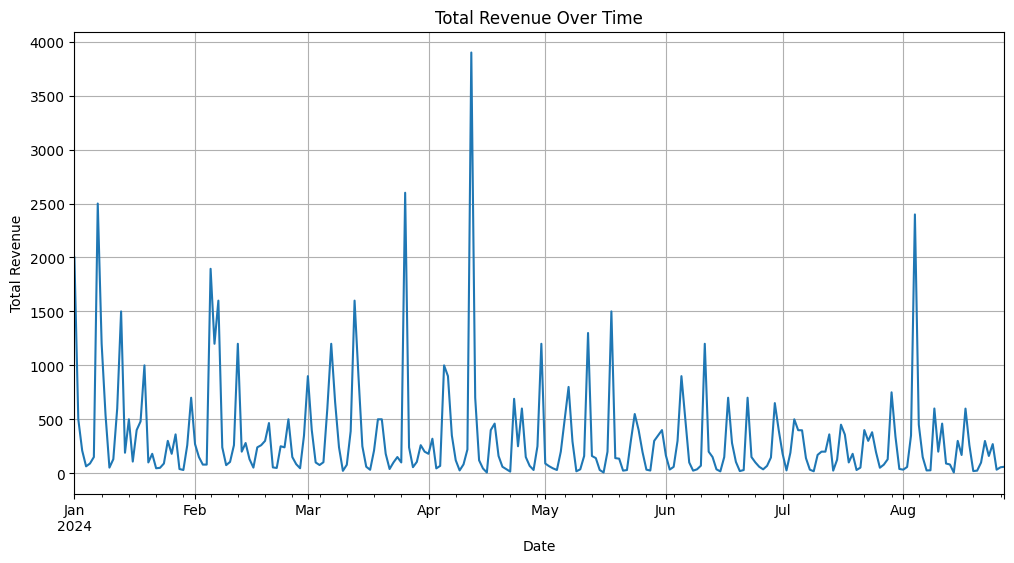

In [16]:
#overall sales trend
plt.figure(figsize=(12, 6))
df.groupby('Date')['Total Revenue'].sum().plot()
plt.title('Total Revenue Over Time')
plt.ylabel('Total Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.show()

The highest total revenue peaked for the month of April.

## Bar Graph
A horizontal bar graph is plotted to show total revenue for each product category.

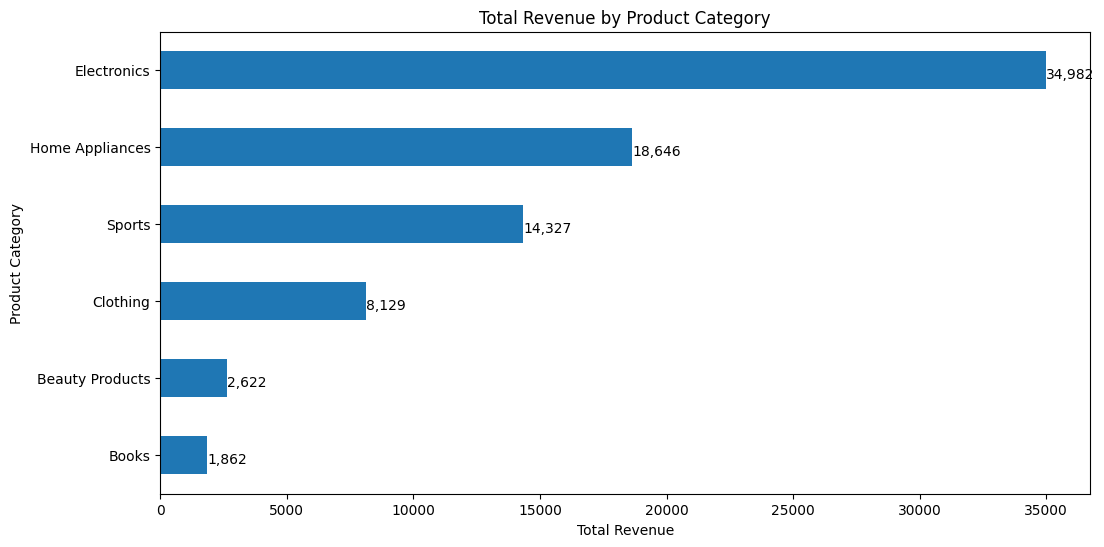

In [17]:
#product categories and revenues
plt.figure(figsize=(12, 6))
total_revenue_by_category = df.groupby('Product Category')['Total Revenue'].sum().sort_values()
ax = total_revenue_by_category.plot(kind='barh')
for i, v in enumerate(total_revenue_by_category):
    ax.text(v + 10, i - 0.1, f'{v:,.0f}', color='black') 

plt.title('Total Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()

The highest revenue share was of electronics, followed by home appliances and the lowest was of books.

## Bar Graph for Top 10 products
A horizontal bar graph was plotted to show the top 10 most sold products and number of units sold of those products.

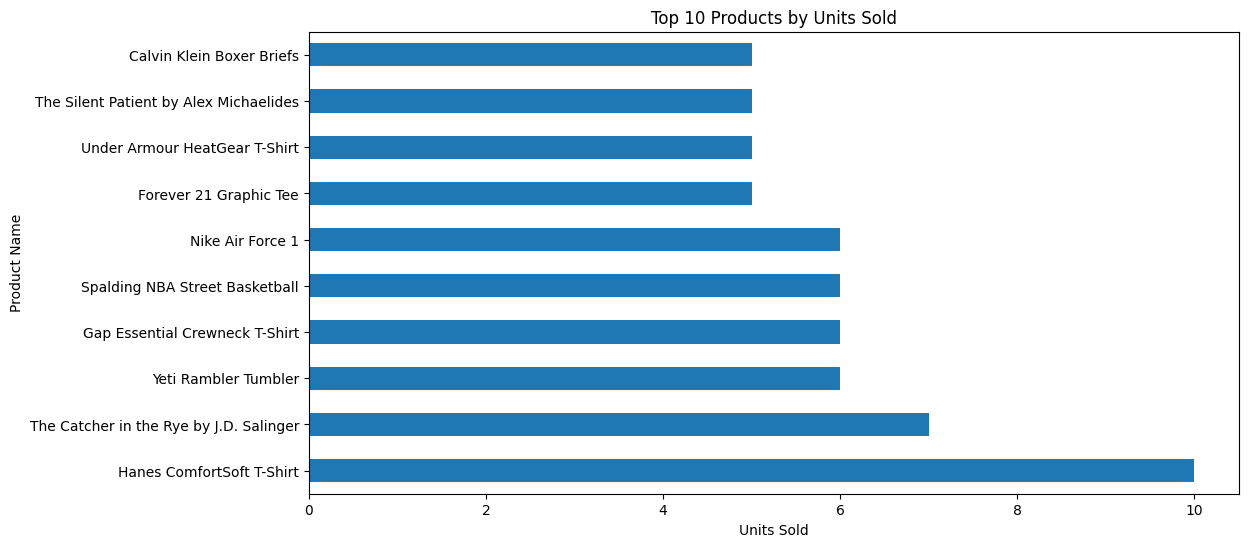

In [18]:
#top 10 products in terms of units sold
plt.figure(figsize=(12, 6))
df.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Products by Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Product Name')
plt.show()

The highest selling product was Hanes T-Shirt followed by The Catcher in the Rye by J.D. Salinger.

## Bar Graph for region-wise revenue
A horizontal bar graph is used to show distribution of total revenue on basis of region.

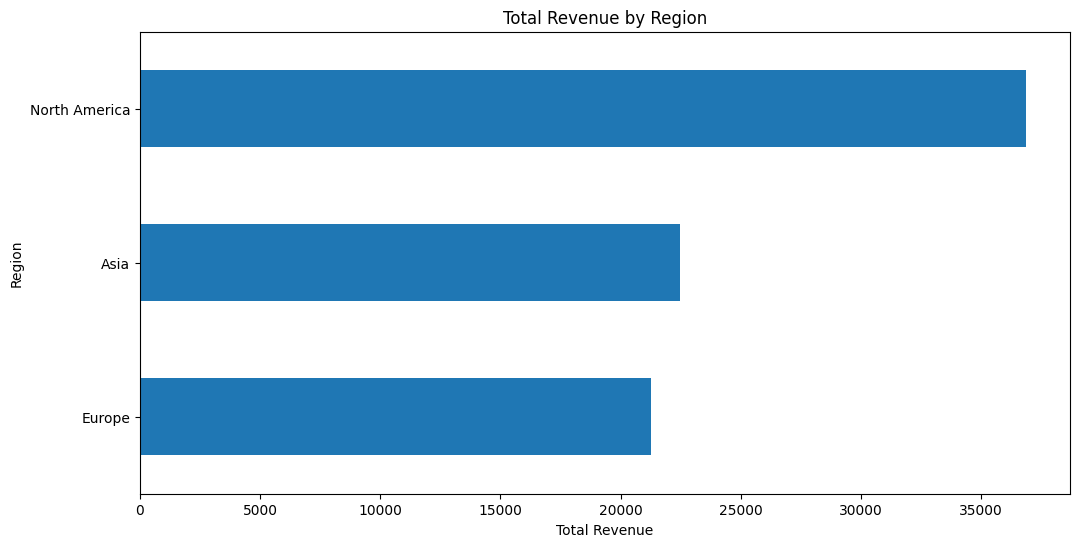

In [19]:
#revenue v/s region
plt.figure(figsize=(12, 6))
df.groupby('Region')['Total Revenue'].sum().sort_values().plot(kind='barh')
plt.title('Total Revenue by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.show()

On the basis of region, the highest revenue was from North America, followed by Asia and then Europe.

## Pie Chart for Payment Method
A pie chart is used to display the distribution of payment methods.

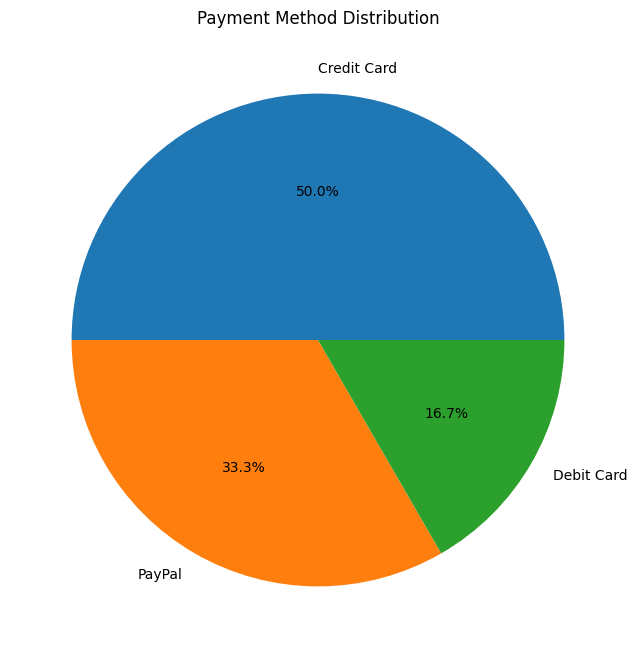

In [20]:
#distribution of payment methods
plt.figure(figsize=(8, 8))
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

The most used payment method is Credit card (50%), followed by PayPal(33.3%).
The least used payment method is Debit card (16.7%).

## Bar Plot for Unit Prices
Bar plots are used show distribution of unit prices across different product categories.

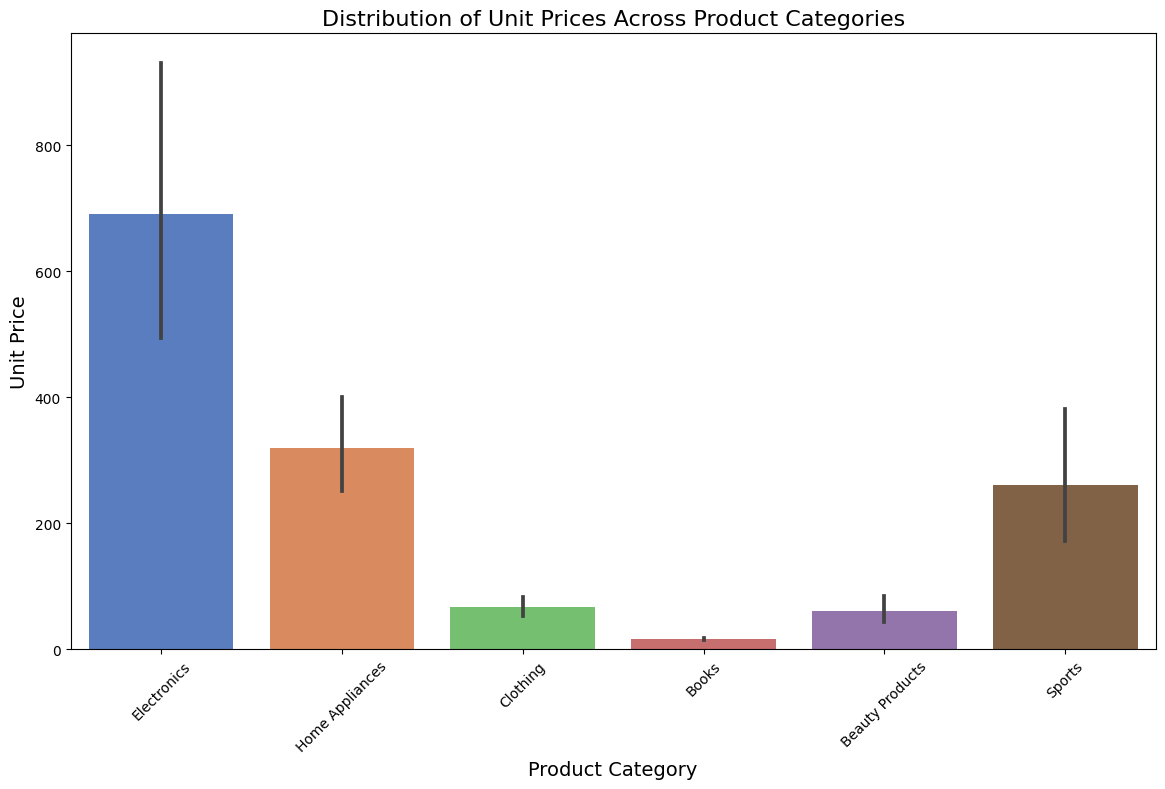

In [21]:
#average unit price for each category
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Product Category', y='Unit Price', palette="muted")
plt.title('Distribution of Unit Prices Across Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Unit Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()

## Bar Graph for Top 10 most expensive products
A horizontal bar graph was plotted to show the top 10 most expensive products and the unit prices of those products.

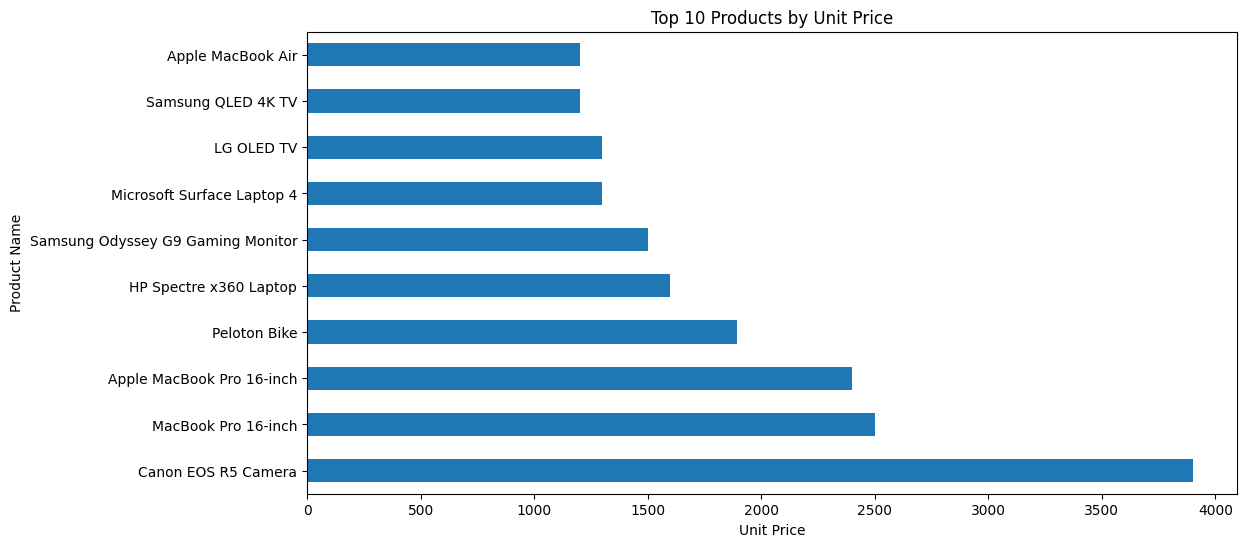

In [22]:
#top 10 products by unit price
plt.figure(figsize=(12, 6))
df.groupby('Product Name')['Unit Price'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Products by Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Product Name')
plt.show()

The most expensive product was Canon EOS R5 Camera costing nearly 4000 dollars, followed by MacBook Pro 16-inch at 2500 dollars.

## Line graph
The graph shows trends in total revenue for various months

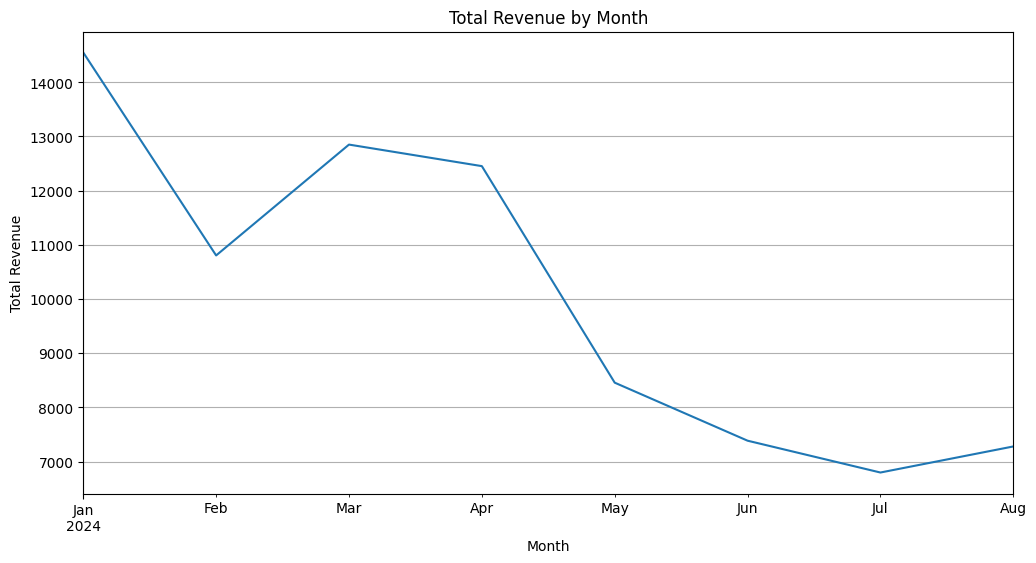

In [23]:
#month-wise revenue
df['Month'] = df['Date'].dt.to_period('M')
plt.figure(figsize=(12, 6))
df.groupby('Month')['Total Revenue'].sum().plot()
plt.title('Total Revenue by Month')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.show()

The total revenue was highest in January 2024 and lowest in July 2024.

## Region-wise top products
The horizontal bar graphs show sales of most popular products in each region.

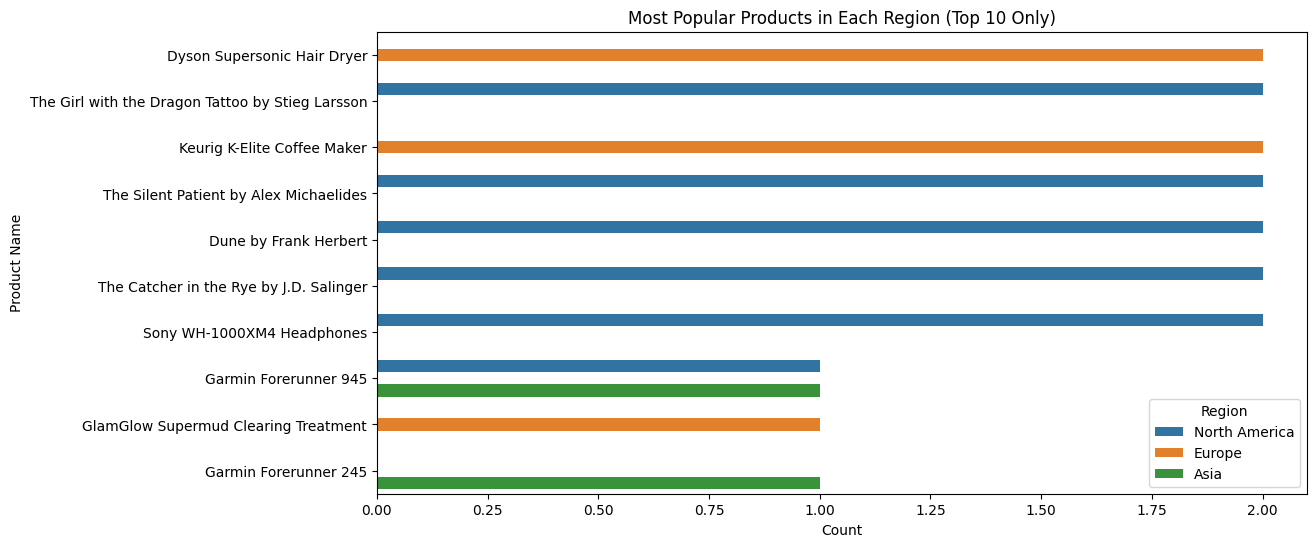

In [24]:
#region-wise top products
top_10_products = df['Product Name'].value_counts().head(10).index
top_10_df = df[df['Product Name'].isin(top_10_products)]

plt.figure(figsize=(12, 6))
sns.countplot(y='Product Name', hue='Region', data=top_10_df, order=top_10_products)
plt.title('Most Popular Products in Each Region (Top 10 Only)')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.show()

## Region-wise popular product category
The horizontal bar graph shows most popular product categories for each region.

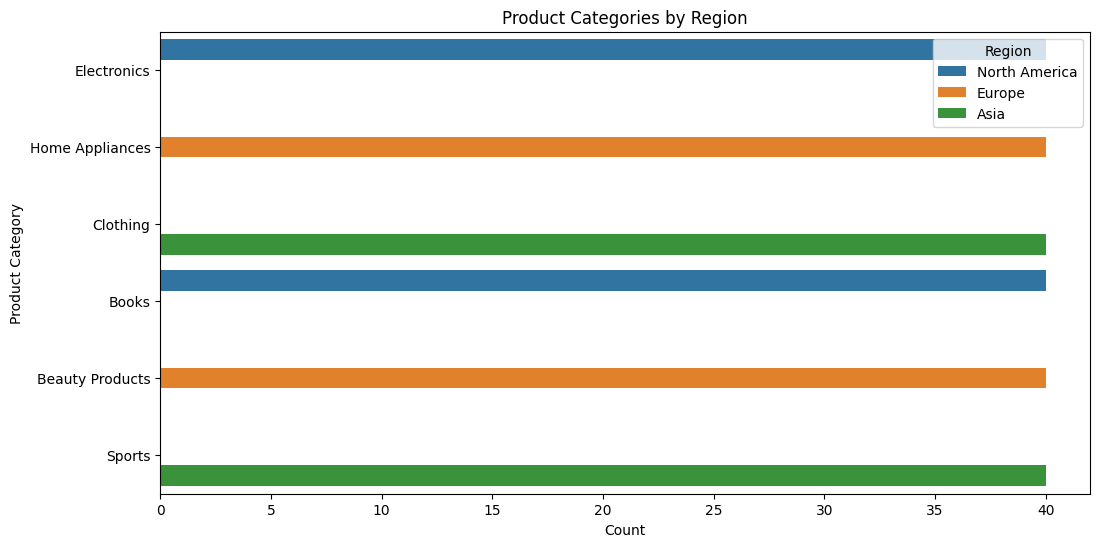

In [25]:
#  product categories in each region
plt.figure(figsize=(12, 6))
sns.countplot(y='Product Category', hue='Region', data=df, order=df['Product Category'].value_counts().index)
plt.title('Product Categories by Region')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

Most popular product categories for
* **Asia:** Clothing, Sports
* **Europe:** Home Appliances, Beauty Products
* **North America:** Electronics, Books

## Day-wise total revenue bar grapg
The horizontal bar graph is used to show total revenue for each day of the week.

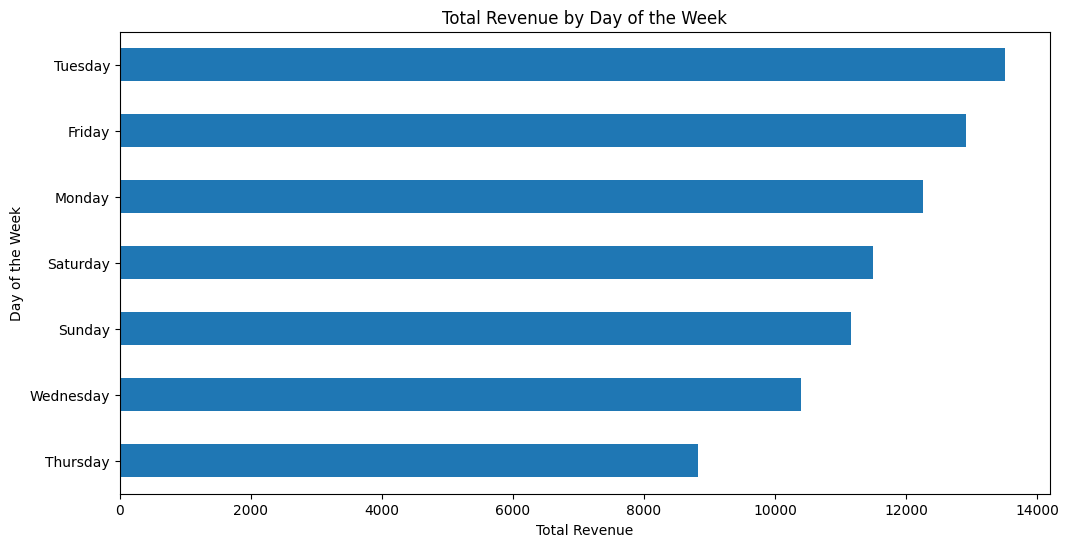

In [26]:
#  revenue by day of the week
df['Day of Week'] = df['Date'].dt.day_name()
plt.figure(figsize=(12, 6))
df.groupby('Day of Week')['Total Revenue'].sum().sort_values().plot(kind='barh')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Total Revenue')
plt.ylabel('Day of the Week')
plt.show()

The highest total revenue in a week is on Tuesday (14,000) and lowest in on Thursday (9,000).

## Region-wise payment method graph
The graph shows distribution of share of payment methods in different regions.

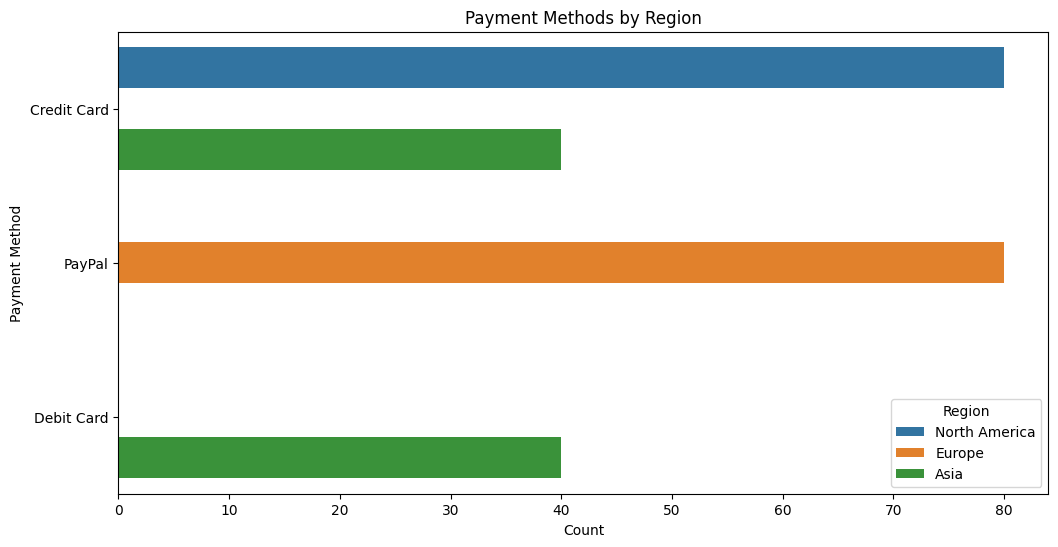

In [27]:
# payment methods in each region
plt.figure(figsize=(12, 6))
sns.countplot(y='Payment Method', hue='Region', data=df, order=df['Payment Method'].value_counts().index)
plt.title('Payment Methods by Region')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()

## Highest revenue generating products
The bar graph shows top-10 products that generate the most revenue.

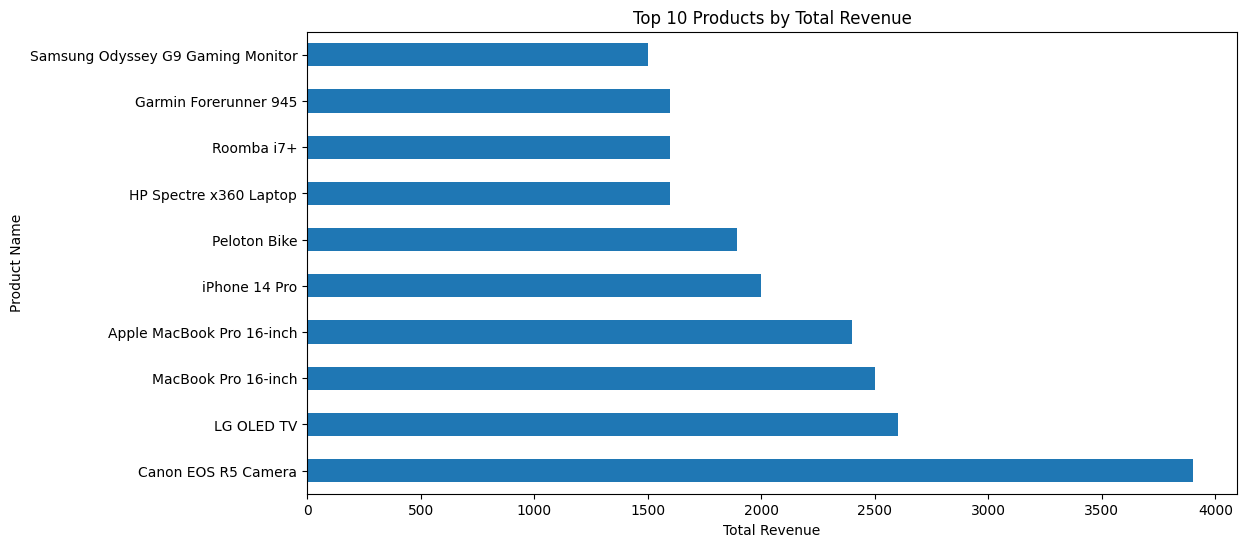

In [28]:
# products with the highest total revenue
plt.figure(figsize=(12, 6))
df.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()

The highest total revenue generating product is Canon EOS R5 Camera.

## Sales trend over time
The graph shows sales trends for different product categories over time.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

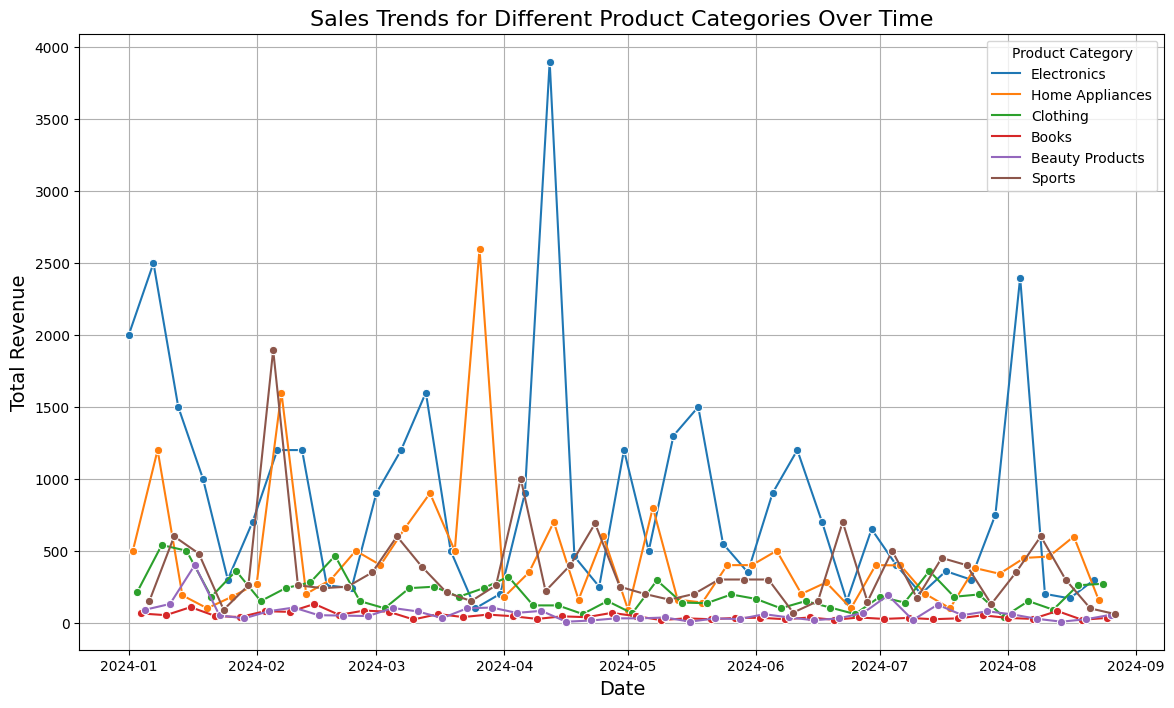

In [29]:
#sales trend over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Date', y='Total Revenue', hue='Product Category', marker='o')
plt.title('Sales Trends for Different Product Categories Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.legend(title='Product Category')
plt.grid(True)
plt.show()

## Pair Plot
The pair plot shows various factors affecting total revenue in different regions.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Figure size 1400x1400 with 0 Axes>

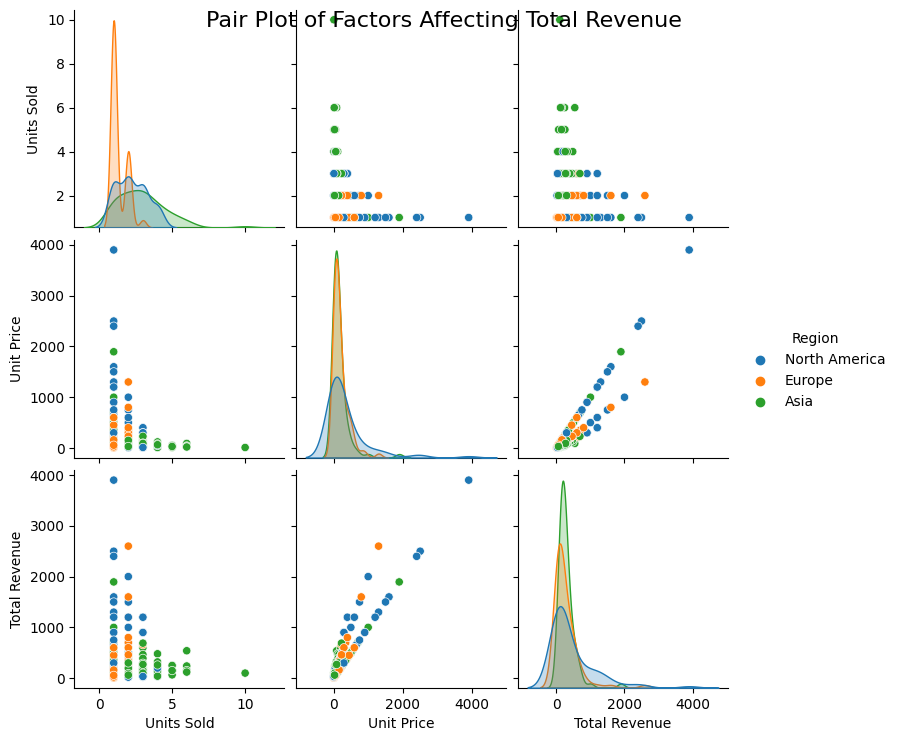

In [30]:
# pair plot
features = ['Units Sold', 'Unit Price', 'Total Revenue', 'Region', 'Product Category']
plt.figure(figsize=(14, 14))
sns.pairplot(df[features], hue='Region')
plt.suptitle('Pair Plot of Factors Affecting Total Revenue', fontsize=16)
plt.show()

## Total revenue Heatmap
The heatmap shows distribution of total revenue by region and product category

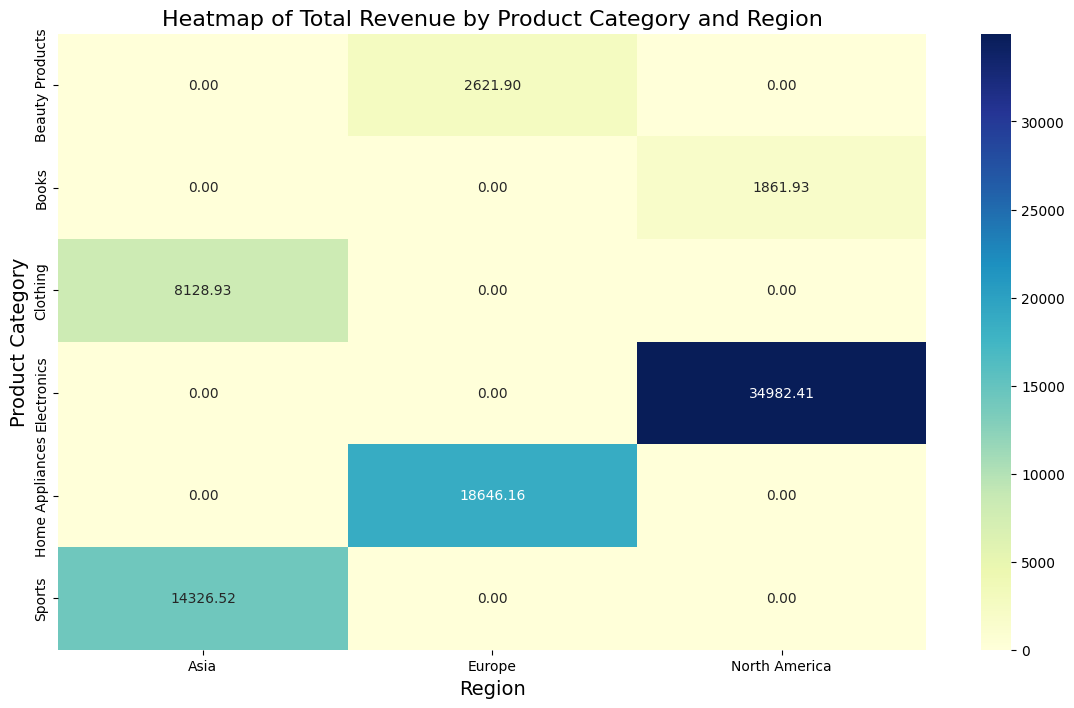

In [31]:
# heatmap of total revenue by region and product category
heatmap_data = df.pivot_table(values='Total Revenue', index='Product Category', columns='Region', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Heatmap of Total Revenue by Product Category and Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.show()


## Treemap of total revenue by product category
The treemap shows distribution of total revenue by product category

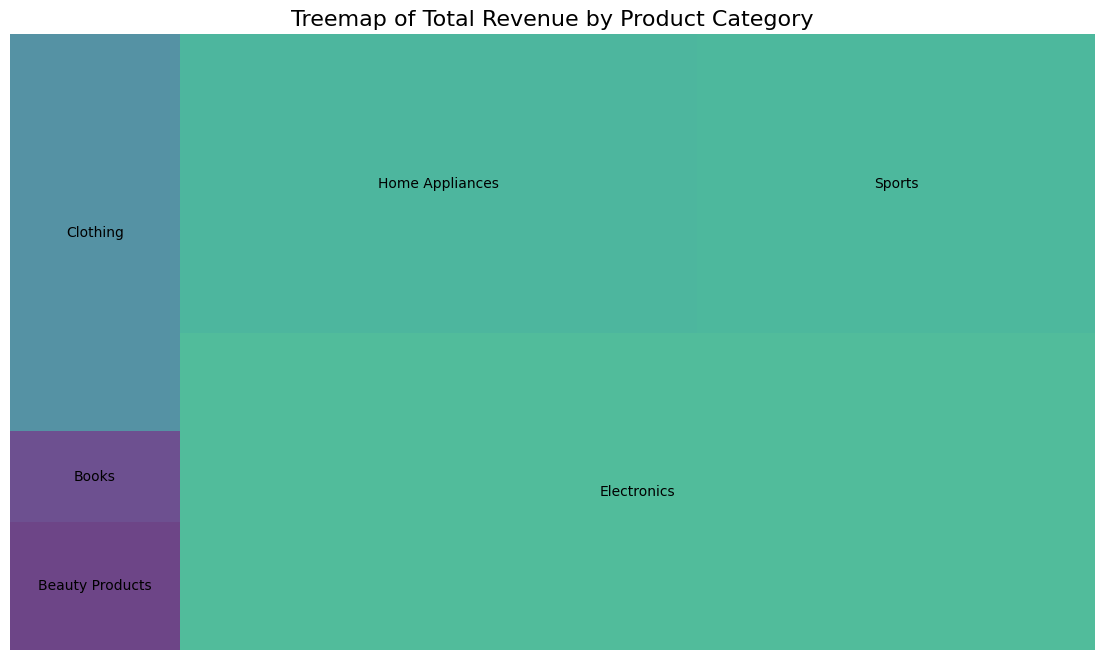

In [32]:
#treemap for total revenue by product category
category_revenue = df.groupby('Product Category')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(14, 8))
squarify.plot(sizes=category_revenue['Total Revenue'], label=category_revenue['Product Category'], alpha=0.8)
plt.title('Treemap of Total Revenue by Product Category', fontsize=16)
plt.axis('off')
plt.show()

Highest total revenue is generated from Electronics category.

## Conclusion
Different data science/data analysis techniques can be used to visualize and understand large amounts of data.